EFFETTUEREMO UNA PREDIZIONE MEDIANTE DEEP LEARNING (NEURAL NETWORK) 

1. Importiamo le librerie necessarie
2. Carichiamo il dataset
3. Useremo una rete neurale per effettuare la predizione

In [ ]:
# installiamo le librerie necessarie
from numpy import loadtxt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# ignoriamo gli errori di warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# carichiamo il file csv con numpy
dataset = pd.read_csv('diabetes.csv')

In [ ]:
# rinominiamo la colonna Outcome in target
dataset.rename(columns={'Outcome':'target'}, inplace=True)

In [ ]:
# definiamo le variabili indipendenti e dipendenti
X = dataset.drop('target', axis = 1)
y = dataset['target']

PARTE DI DEEP LEARNING

In [32]:
# definamo il modello di keras
# Sequential: https://keras.io/guides/sequential_model/
# Dense: https://keras.io/api/layers/core_layers/dense/

model = Sequential()

# Aggiungiamo un layer di input con 12 neuroni e funzione di attivazione relu
model.add(Dense(12, input_dim=X.shape[1], activation='relu', name='input'))

# Aggiungiamo un layer nascosto con 8 neuroni e funzione di attivazione relu
model.add(Dense(8, activation='relu', name='hidden1'))

# Aggiungiamo un layer di output con 1 neurone e funzione di attivazione sigmoid
# il neurone di output è un neurone di classificazione binaria
model.add(Dense(1, activation='sigmoid', name='output'))

# addesso compiliamo il modello
# https://keras.io/api/models/model_training_apis/
# https://keras.io/api/optimizers/

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# adesso addestriamo il modello
history = model.fit(X, y, epochs=400, batch_size=10, verbose=0)

# printiamo a video il loss e l'accuracy finale
score = model.evaluate(X, y)
print('loss:', score[0])
print('accuracy:', score[1])



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 12)                108       
                                                                 
 hidden1 (Dense)             (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
24/24 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8021
loss: 0.41043519973754883
accuracy: 0.8020833134651184


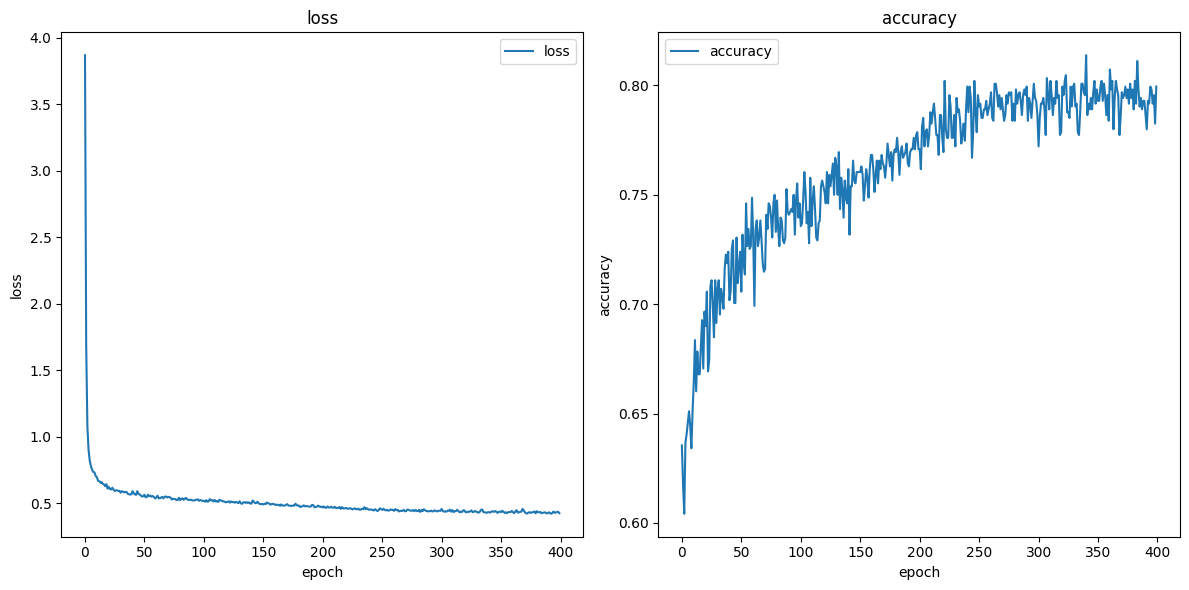

In [33]:
# plot loss e accuracy
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6), facecolor='white')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()


plt.tight_layout()
plt.show()

PARTE DI MACHINE LEARNING: REGRESSIONE LOGISTICA

In [ ]:
# eseguiamo ora una regressione logistica sul dataset india diabetes
# importiamo le librerie necessarie
from sklearn.linear_model import LogisticRegression

# Il log loss è una misura comune per l'accuratezza nella regressione logistica. 
# Un valore di log loss più basso significa una previsione migliore: 
# un modello perfetto avrebbe un log loss pari a 0.
from sklearn.metrics import log_loss

# creiamo un modello di regressione logistica
model_reg = LogisticRegression()

# addestriamo il modello
model_reg.fit(X, y)

# calcoliamo l'accuratezza del modello e il loss della regressione logistica
score_reg = model_reg.score(X, y)
loss_reg = log_loss(y, model_reg.predict_proba(X))
print('loss:', loss_reg)
print('accuracy:', score_reg)

CONFRONTIAMO I DUE MODELLI NELLE PREVISIONI

In [37]:
# confrontiamo le predizione dei due modelli
predizione_nn = (model.predict(X) > 0.5).astype(int)
predizione_reg = (model_reg.predict(X) > 0.5).astype(int)

reg = 0
nn = 0
for i in range(len(X)):
    if predizione_nn[i] != y[i]:
        nn += 1
        #print("%s => NN: %d, Reg: %d, Atteso: %d" % (X.iloc[i].tolist(), predizione_nn[i], predizione_reg[i], y[i]))
    
    elif predizione_reg[i] != y[i]:
        reg += 1
        #print("%s => NN: %d, Reg: %d, Atteso: %d" % (X.iloc[i].tolist(), predizione_nn[i], predizione_reg[i], y[i]))

print("NN: %d, Reg: %d Totale: %d" % (nn, reg, len(X)))


24/24 [==============================] - 0s 2ms/step
NN: 152, Reg: 49 Totale: 768
